# Calculating the difference between predicted and actual AQI

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('../predictions/lax_weekly_predictions.csv', index_col='Date', parse_dates=True)

In [6]:
df.head()

,AQI,sarima,hw
Date,,,
2020-01-05,93.600000,63.666756,NaN
2020-01-12,64.428571,64.724279,65.147809
2020-01-19,77.142857,65.270242,64.200666
2020-01-26,75.857143,72.824228,57.800712
2020-02-02,63.285714,70.645630,73.408318


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27 entries, 2020-01-05 to 2020-07-05
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AQI     27 non-null     float64
 1   sarima  27 non-null     float64
 2   hw      26 non-null     float64
dtypes: float64(3)
memory usage: 864.0 bytes


In [8]:
feb_thru_may = df.loc['2020-02':'2020-05']

In [9]:
feb_thru_may

,AQI,sarima,hw
Date,,,
2020-02-02,63.285714,70.645630,73.408318
2020-02-09,61.428571,66.610112,60.904771
2020-02-16,60.000000,67.150673,60.059694
2020-02-23,67.571429,69.435552,52.603425
2020-03-01,58.142857,71.622286,57.805523
2020-03-08,52.714286,74.347078,58.663026
2020-03-15,40.285714,70.451628,70.627759
2020-03-22,44.285714,75.986352,55.969038
2020-03-29,46.714286,76.492416,66.853627


In [10]:
feb_thru_may['balanced_prediction'] = (feb_thru_may['sarima'] + feb_thru_may['hw']) / 2

<ipython-input-10-bbe34570a1b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feb_thru_may['balanced_prediction'] = (feb_thru_may['sarima'] + feb_thru_may['hw']) / 2


In [11]:
feb_thru_may

,AQI,sarima,hw,balanced_prediction
Date,,,,
2020-02-02,63.285714,70.645630,73.408318,72.026974
2020-02-09,61.428571,66.610112,60.904771,63.757442
2020-02-16,60.000000,67.150673,60.059694,63.605183
2020-02-23,67.571429,69.435552,52.603425,61.019488
2020-03-01,58.142857,71.622286,57.805523,64.713905
2020-03-08,52.714286,74.347078,58.663026,66.505052
2020-03-15,40.285714,70.451628,70.627759,70.539694
2020-03-22,44.285714,75.986352,55.969038,65.977695
2020-03-29,46.714286,76.492416,66.853627,71.673021


In [22]:
sarima_diff = feb_thru_may['AQI'] - feb_thru_may['sarima'] 

In [23]:
sarima_diff

Date
2020-02-02    -7.359915
2020-02-09    -5.181541
2020-02-16    -7.150673
2020-02-23    -1.864123
2020-03-01   -13.479429
2020-03-08   -21.632792
2020-03-15   -30.165914
2020-03-22   -31.700637
2020-03-29   -29.778130
2020-04-05   -25.617349
2020-04-12   -36.926017
2020-04-19   -30.208345
2020-04-26    33.202804
2020-05-03    38.157712
2020-05-10    79.921877
2020-05-17    -4.577011
2020-05-24   -23.026541
2020-05-31    17.060424
dtype: float64

In [24]:
hw_diff = feb_thru_may['AQI'] - feb_thru_may['hw']

In [25]:
hw_diff

Date
2020-02-02   -10.122604
2020-02-09     0.523800
2020-02-16    -0.059694
2020-02-23    14.968004
2020-03-01     0.337334
2020-03-08    -5.948741
2020-03-15   -30.342045
2020-03-22   -11.683324
2020-03-29   -20.139342
2020-04-05   -10.029216
2020-04-12   -32.582002
2020-04-19   -19.115771
2020-04-26    42.983478
2020-05-03    46.847472
2020-05-10    89.749624
2020-05-17    11.626831
2020-05-24    -7.111349
2020-05-31     8.150109
dtype: float64

In [26]:
balanced_diff = feb_thru_may['AQI'] - feb_thru_may['balanced_prediction'] 

In [27]:
balanced_diff

Date
2020-02-02    -8.741259
2020-02-09    -2.328870
2020-02-16    -3.605183
2020-02-23     6.551940
2020-03-01    -6.571048
2020-03-08   -13.790766
2020-03-15   -30.253980
2020-03-22   -21.691980
2020-03-29   -24.958736
2020-04-05   -17.823283
2020-04-12   -34.754009
2020-04-19   -24.662058
2020-04-26    38.093141
2020-05-03    42.502592
2020-05-10    84.835751
2020-05-17     3.524910
2020-05-24   -15.068945
2020-05-31    12.605267
dtype: float64

In [31]:
diffs = pd.DataFrame({
    'Sarima': sarima_diff,
    'Holt Winters': hw_diff,
    'Balanced': balanced_diff
})

In [32]:
diffs

,Sarima,Holt Winters,Balanced
Date,,,
2020-02-02,-7.359915,-10.122604,-8.741259
2020-02-09,-5.181541,0.523800,-2.328870
2020-02-16,-7.150673,-0.059694,-3.605183
2020-02-23,-1.864123,14.968004,6.551940
2020-03-01,-13.479429,0.337334,-6.571048
2020-03-08,-21.632792,-5.948741,-13.790766
2020-03-15,-30.165914,-30.342045,-30.253980
2020-03-22,-31.700637,-11.683324,-21.691980
2020-03-29,-29.778130,-20.139342,-24.958736


<AxesSubplot:title={'center':'Difference between predicted and actual AQI for Los Angeles County'}, xlabel='Date'>

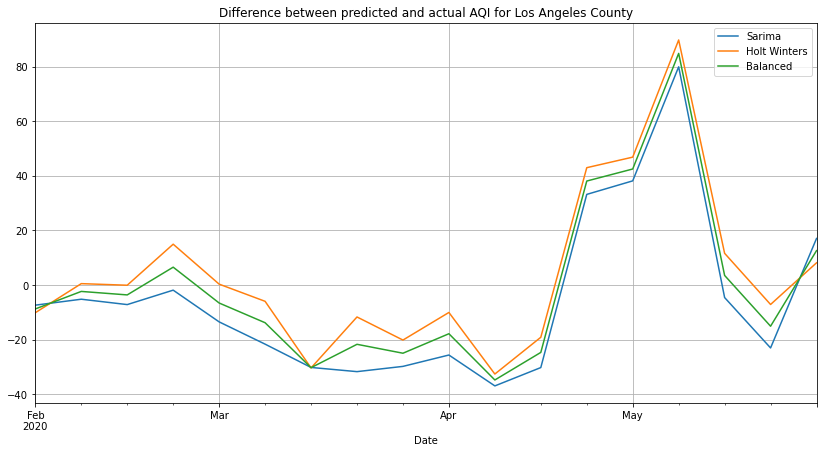

In [43]:
diffs.plot(figsize = (14, 7), title='Difference between predicted and actual AQI for Los Angeles County', grid=True)